# Data Driven Engineering - Diabetes Dataset Classification

## Analysis of the Problem

- Name:       Ulrike Schumacher
- Matr. Nr.:  2041229
- Dataset:    Binary Classification of Diabetes Risk

Diabetes is a serious metabolic disease. The disease impairs the production of the hormone insulin in the human body. It ensures that the sugar absorbed through eating and drinking is transported into the cells, where it is converted into energy for the body. Without insulin, the sugar in the blood cannot be used and accumulates. In type 1 diabetes, insulin cannot be produced at all and often causes symptoms as early as adolescence. In type 2 diabetes, insulin cannot be produced sufficiently and tends to occur at an older age, often in a combination with an unhealthy lifestyle. To reduce the risk for the body, it is important to supply the body with insulin artificially as soon as possible after the diagnosis.

In Germany, about 7.2% of all adults suffer from this desease. However, the number of unreported cases is much higher, as the disease is often detected very late or not at all which can lead to catastrophic consequences. Possible consequences are an increased risk for heart attacks or strokes, amputations, visual impairment, kidney damage and sexual dysfunction which negatively affects the quality of life and can lead to premature death. 

In order to prevent the resulting long-term consequences and to be able to diagnose the disease earlier, researchers at the Metropolitan University Sylhet in Bangladesh and Queen Mary University of London have developed a questionnaire to enable early diagnosis. This questionnaire consists of 16 question that list common and less common symptoms of diabetes. The questions are listed below:

1. Age: 20–35 / 36–45 / 46–55 / 56–65 / above 65
2. Sex: Male / Female
3. Does the amount of urine exceed 3l per day (Polyuria)?: Yes / No
4. Do you have frequent severe thirst (Polydipsia)?: Yes / No
5. Was there a sudden weight loss?: Yes / No
6. Do you feel weakness?: Yes / No
7. Do you have abnormally increased appetite (Polyphagia)?: Yes / No
8. Do you have a genital thrush?: Yes / No
9. Do you have visual blurring?: Yes / No
10. Do you experience excessive itching? Yes / No
11. Do you feel irritability? Yes / No
12. Do you experience delayed healing? Yes / No
13. Do you suffer from partial paresis? Yes / No
14. Do you have muscle stiffness? Yes / No
15. Do you have circular hair loss (Alopecia)?: Yes / No
16. Are you obese? Yes / No

With the collected data, a prediction is made that states, whether the patient has an increased risk of suffering from diabetes. Thus, the data is used to make a binary classification with the results 1 (increased risk) and 0 (low risk).
In order to obtain a meaningful evaluation, the test was performed on 520 people who were already known to have diabetes or not. 

This classification is carried out in the following by a neural network and different algorithms. Afterwards, the results are discussed and it is evaluated if it is reasonable to make a binary classification with the questionaire or whether it is not possible with the existing data set. With a positive result, this could change the way diagnosis are made, as every patient can easily answer these questions at home before transferring them to the doctor online.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import copy
from sklearn.preprocessing import Binarizer

In [3]:
import math
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
import scipy
from scipy.signal import savgol_filter

import plotly.express as px
from copy import deepcopy

import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
# Data Preparation and Scoring
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LogNorm
from sklearn.decomposition import PCA

import plotly.express as px

from sklearn.tree import plot_tree

from sklearn.svm import SVR
from sklearn.svm import SVC #binary classifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA

import keras.backend as K

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import fbeta_score

In [6]:
# ML Algorithms
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, models, layers, regularizers
tf.__version__
from tensorflow.keras.layers.experimental import preprocessing
import keras_tuner as kt
import IPython

In [7]:
import datetime

In [8]:
# ML Algorithms to be used
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import IPython

## Data Exploration and Preparation

### Import and Explore Data

In order to get an overview of the given data, they are analyzed in the following section and prepared in a way that the algorithms can use the data later without further steps. The important points here are:

- Are there gaps (NaN entries) or outliers in the data?
- Is the data evenly distributed?
- What is the data type of the given entries? Can it be used for classification?
- How is the data correlated with each other? Are there attributes that can be combined? Can attributes be left out?

To answer these questions, the first step is to have a look on a cutout of the given dataframe.

In [10]:
df = pd.read_csv('diabetes_data_upload.csv', sep=",")

In [11]:
df.head(10)

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   
5   55   Male      Yes        Yes                 No      Yes        Yes   
6   57   Male      Yes        Yes                 No      Yes        Yes   
7   66   Male      Yes        Yes                Yes      Yes         No   
8   67   Male      Yes        Yes                 No      Yes        Yes   
9   70   Male       No        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   
5             No             Yes     Yes           No             Yes   
6            Yes              No      No           No             Yes   
7             No             Yes     Yes          Yes              No   
8            Yes              No     Yes          Yes              No   
9             No             Yes     Yes          Yes              No   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive  
5              No              Yes      Yes     Yes  Positive  
6             Yes               No       No      No  Positive  
7             Yes              Yes       No      No  Positive  
8             Yes              Yes       No     Yes  Positive  
9              No               No      Yes      No  Positive

#### Are there gaps or outliers in the data?

Before evaluating the data, it is necessary to first examine it for completeness. 520 patients filled out the questionnaire with 16 questions, so there must be a total of 520 rows and 17 columns (16 questions + the corresponding class). This condition is met because none of the columns has a zero entry. <br>
Unfortunately, the scientific publication for this dataset pointed out 20 missing entries that no longer appear in the present dataset. This means that data were inserted subsequently. It is not possible to trace back by whom and on what basis this data was inserted. Therefore, it would be possible that it is not representative and negatively effects the classification.

Furthermore, it is checked if there is data that do not fit into the data set. In this case we are allowed to have 2 different entries per column (Yes / No or Positive / Negative). The only exception is age, which is allowed to have a wider range and will be analyzed at a later time. As you can see, each column has 2 differing entries and therefore has no physical outliers have to be removed.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [13]:
distinctCounter = df.apply(lambda x: len(x.unique()))
print(distinctCounter)

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64


#### Is the data evenly distributed?

The second important question relates to the representativeness of the data set, or to what extent the data set is applicable to the broader community. The important thing here is that there are enough patients in both classes. In our case, 38.5% of the respondents have low diabetic risk and 61.5% have elevated risk. Since it is particularly important to detect patients who are at increased risk, it is advantageous for us that slightly more than half belong to this class. Nevertheless, it is still possible to assume an approximately even distribution here. 

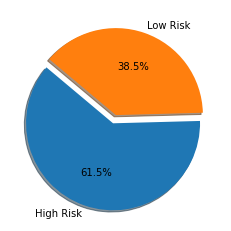

In [14]:
distribution = df['class'].value_counts()

high = round((distribution[0] / (distribution[0]+distribution[1]))*100,2)
low = round((distribution[1] / (distribution[0]+distribution[1]))*100,2)

labels_pie = 'High Risk', 'Low Risk'
sizes = [high, low]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels_pie, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

The individual attributes are shown below as a function of the associated class. Here it is very easy to see which symptoms frequently occur with diabetis and which have a less significant influence. For example, almost all patients with an increased risk suffer from polyurea and the majority of patients with low risk do not suffer from this symptom. An example of a symptom with less significance is itching. Here, at first glance, no direct correlation to an increased risk of diabetes can be identified.

However, one problem appears in the data. There are hardly any female patients with a low risk. This could lead to problems when generalizing the data set for both genders. For symptoms, the data are more evenly distributed. However, in order to interpret them further, a deeper medical understanding is needed. The relevance of the individual symptoms will be considered later.

The last graph shows the distribution of the patients' age. This approximates a normal distribution, suggesting that the data set is more applicable to patients with an age around the mean (approximately 50). The average age of diagnosis for type 1 diabetes is in adolescence or early adulthood and for type 2 the average age in Germany is 61. The youngest patient in the dataset is 18, which means that the dataset is more suitable for the diagnosis of type 2 diabetes.

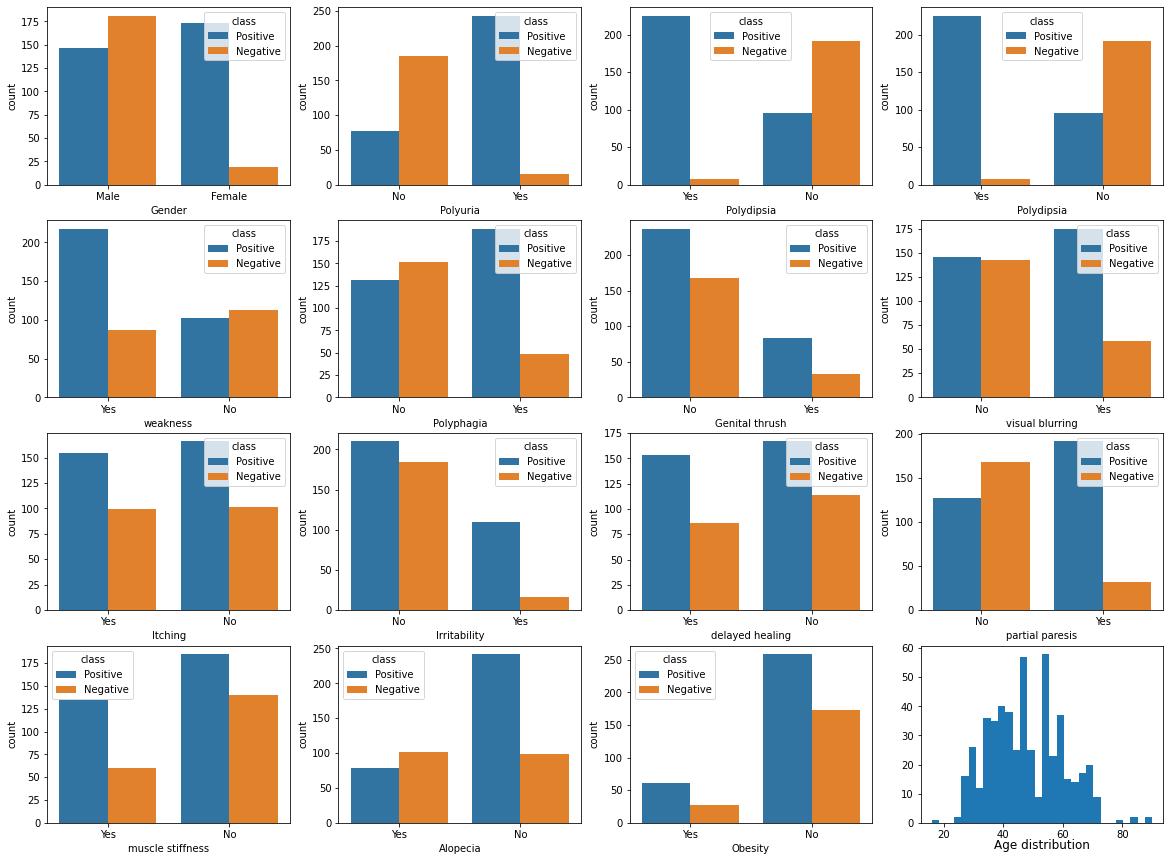

In [15]:
fig, ax =plt.subplots(4,4,figsize=(20,15))
sns.countplot(df['Gender'],hue=df['class'], data=df, ax=ax[0,0])
sns.countplot(df['Polyuria'],hue=df['class'], data=df, ax=ax[0,1])
sns.countplot(df['Polydipsia'],hue=df['class'], data=df, ax=ax[0,2])
sns.countplot(df['Polydipsia'],hue=df['class'], data=df, ax=ax[0,3])
sns.countplot(df['weakness'],hue=df['class'], data=df, ax=ax[1,0])
sns.countplot(df['Polyphagia'],hue=df['class'], data=df, ax=ax[1,1])
sns.countplot(df['Genital thrush'],hue=df['class'], data=df, ax=ax[1,2])
sns.countplot(df['visual blurring'],hue=df['class'], data=df, ax=ax[1,3])
sns.countplot(df['Itching'],hue=df['class'], data=df, ax=ax[2,0])
sns.countplot(df['Irritability'],hue=df['class'], data=df, ax=ax[2,1])
sns.countplot(df['delayed healing'],hue=df['class'], data=df, ax=ax[2,2])
sns.countplot(df['partial paresis'],hue=df['class'], data=df, ax=ax[2,3])
sns.countplot(df['muscle stiffness'],hue=df['class'], data=df, ax=ax[3,0])
sns.countplot(df['Alopecia'],hue=df['class'], data=df, ax=ax[3,1])
sns.countplot(df['Obesity'],hue=df['class'], data=df, ax=ax[3,2])
ax[3,3].hist(df['Age'], bins=30)
ax[3,3].set_title('Age distribution', y=-0.18)
fig.show()

#### What is the data type of the given entries? Can it be used for classification?

To answer this question, we will look at the section of the table shown above. You can see directly that for the age, integers are used and for the other entries, strings. <br>
To use these data for the classification, they are converted into the binary numbers 0 and 1. Male is set to 1 and female to 0. Yes or positive is set to 1 (the value True in Python is also 1) and no or negative is converted to 0.

In [16]:
df = df.replace(['Yes', 'No'], [1,0])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Positive', 'Negative'], [1,0])

In addition, the 'Age' column contains integers with values approximately between 18 and 90. These are normalized to a value range between 0 and 1 so that all entries have the same value range. <br>
Again, the first 10 entries are displayed. It can be seen that all strings have now been replaced with binary values and that the value range of the age has been normalized.

In [17]:
norm= pp.MinMaxScaler(feature_range=(0, 1))
df['Age']= norm.fit_transform(df[['Age']])

df.head(10)

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0  0.324324       1         0           1                   0         1   
1  0.567568       1         0           0                   0         1   
2  0.337838       1         1           0                   0         1   
3  0.391892       1         0           0                   1         1   
4  0.594595       1         1           1                   1         1   
5  0.527027       1         1           1                   0         1   
6  0.554054       1         1           1                   0         1   
7  0.675676       1         1           1                   1         1   
8  0.689189       1         1           1                   0         1   
9  0.729730       1         0           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   
5           1               0                1        1             0   
6           1               1                0        0             0   
7           0               0                1        1             1   
8           1               1                0        1             1   
9           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1        1   
1                0                1                 0         1        0   
2                1                0                 1         1        0   
3                1                0                 0         0        0   
4                1                1                 1         1        1   
5                1                0                 1         1        1   
6                1                1                 0         0        0   
7                0                1                 1         0        0   
8                0                1                 1         0        1   
9                0                0                 0         1        0   

   class  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1

#### How is the data correlated with each other? Are there attributes that can be combined? Can attributes be left out?

To see how the individual attributes correlate with each other and with the class, the correlation matrix is considered. The closer the value of the individual tile is to 1 or -1, the stronger is the correlation between the two attributes. For example, if we look at the tile in the upper right corner, we see that class correlates with age with a value of about 0.2. This is not particularly high. 

The highest correlations are between polyuria, polydypsia and class. Considering the clinical picture, any other assumption would not make sense. Other attributes correlate only weakly with each other.

In this case, the correlation matrix does not provide a large enough correlation that attributes can be grouped together.

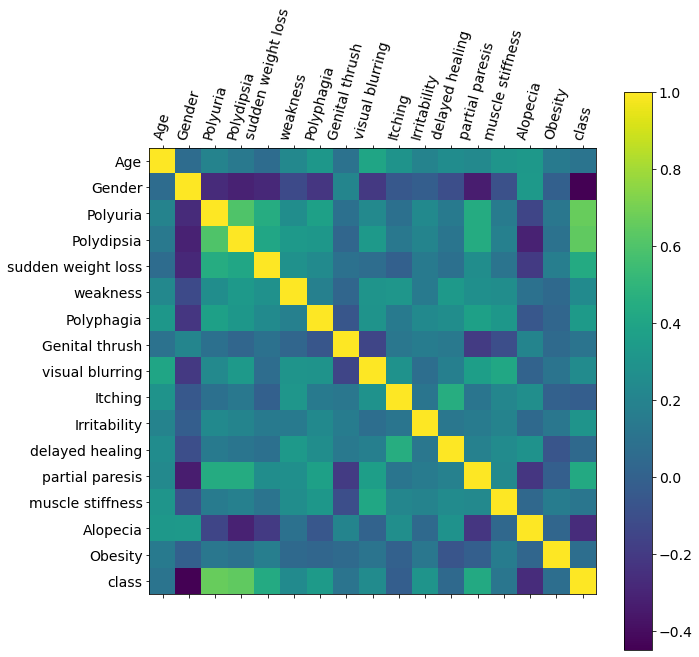

In [18]:
correlationMatrix = pd.DataFrame(df).corr() 

f = plt.figure(figsize=(10,10 ))
plt.matshow(correlationMatrix, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=75)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

Für die weitere Verarbeitung wird der Datensatz nun in Attribute und Labels aufegteilt.

In [19]:
labels = df['class'].astype(int).copy()
features = df.copy().drop(['class'],axis=1)

### PCA Analysis

Principal Component Analysis (PCA) is a method in data processing to reduce the dimensionality of the data. This makes the data faster and easier to process. Furthermore, when dimensionality is reduced in 2D or 3D, data of higher dimensions can be visualized in a human-readable graph. <br>
With a total of 16 dimensions (number of attributes) and 520 instances, the existing data set can be easily processed even without dimensionality reduction. However, the 2D and 3D graph can directly give an understanding of how well the data can be classified. For example, if there are already well visible clusters in the 2D graph, it is reasonable to conclude that a classification algorithm can easily detect this pattern in higher dimensions as well. Another advantage of PCA is that outliers in the values can be suppressed.

Dimensionality reduction usually always comes at the expense of accuracy. So it is a trade-off between accuracy and computational speed.

In [20]:
def scatterPlot(x_DF, y_DF, methodName):
    df = pd.DataFrame(data=x_DF.loc[:,0:1], index=x_DF.index)
    df = pd.concat((df,y_DF), axis=1, join="inner")
    df.columns = ["First Dimension", "Second Dimension", "Label"]
    sns.lmplot(x="First Dimension", y="Second Dimension", hue="Label", data=df, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Visualization of the data segragation using "+methodName)

In [21]:
def scatterPlot3D(x_DF, y_DF, methodName):
    df = pd.DataFrame(data=x_DF.loc[:,0:2], index=x_DF.index)
    df = pd.concat((df,y_DF), axis=1, join="inner")
    df.columns = ["First Dimension", "Second Dimension","Third Dimension", "Label"]

    fig = px.scatter_3d(df, x='First Dimension', y='Second Dimension', z='Third Dimension',\
                          color='Label', symbol='Label', opacity=0.7, \
                          color_continuous_scale=px.colors.sequential.Viridis, width = 600, height = 500) 

    title = "Visualization of the data segragation using "+methodName
    fig.update_layout(title_text=title, showlegend = True, hovermode = False)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))

    fig.show() 

In [22]:
pca = PCA()
pca.fit(features)
features_pca = pd.DataFrame(pca.transform(features))
print(pca.explained_variance_ratio_)
print("First 2: ", np.round(sum(pca.explained_variance_ratio_[0:1])*100,2),"%")
print("First 3: ", np.round(sum(pca.explained_variance_ratio_[0:2])*100,2),"%")

features_train_PCA_inverse = pca.inverse_transform(features_pca)
features_train_PCA_inverse = pd.DataFrame(data=features_train_PCA_inverse, index=features.index)

[0.26375433 0.14085512 0.08862708 0.06897407 0.0609996  0.05331559
 0.04837496 0.0444091  0.03974555 0.03725897 0.03525529 0.03235552
 0.03007125 0.02797614 0.02323853 0.00478889]
First 2:  26.38 %
First 3:  40.46 %


The 16 dimensions of the data set were reduced to 2 or 3 in order to be represented in a chart. One can recognize a large area in which the patients with high risk are represented, an area in which both classes overlap and an area in which patients with low risk are represented. This allows the thesis that a classification of the two areas is well possible.

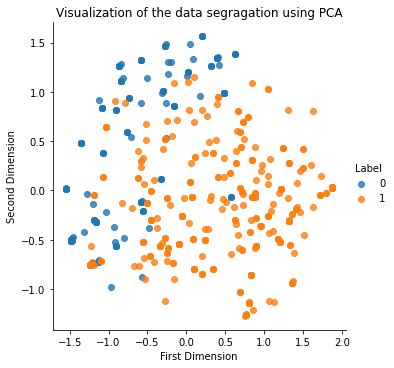

In [23]:
scatterPlot(features_pca, labels, 'PCA')
scatterPlot3D(features_pca, labels, "PCA")

In the following, the data set is reduced to the extent that 90% of the information is retained. This suppresses noise and there is a possibility that the classifiers will produce a better result with this data than with the original 16 dimensions. This will be considered in more detail later.

In [24]:
pca_classificator = PCA(n_components = 0.9)
pca_classificator.fit(features)
features_reduced= pd.DataFrame(pca_classificator.transform(features))

### Train and Test Split

The given data set must be divided into training and test data for further processing. The test size is set to 25% so that of the 520 instances, 130 are used as test data and 390 as training data. The training data is again divided into 4 randomly assigned data sets to be used for the k-fold method. <br>
The same principle is applied to the PCA data.

In [25]:
test_size = 0.25
random_state = 42
n_splits = 5
shuffle = True

In [26]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_reduced,
labels, test_size=test_size,
random_state=random_state, stratify=labels)

k_fold_pca = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features,
labels, test_size=test_size,
random_state=random_state, stratify=labels)

k_fold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

## Testing Phase I: Baseline Models

#### Used Classification Algorithms

The most popular and frequently used classifiers were used as algorithms and compared at the end. The algorithms used are the following: 

- Stochastic Gradient Descent
- Naive Bayes
- Random Forest Classifier
- Support Vector Machine
- Logistic Regression

The training of the algorithms is carried out in each case with the original data (16 dimensions) and the data reduced by PCA to 90% of the information (12 dimensions). This is to show whether the noise reduction can provide a good and meaningful result despite the loss of information. 

The parameters of the algorithms were optimized by a GridSearchCV procedure. This procedure runs through various parameter settings and isolates the best configuration found.

#### Loss Function

To evaluate the performance of each k-fold, a loss value is calculated for each run. For a binary classification, the log loss is particularly useful. It compares each of the predicted probabilities to the actual class output, which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That is, how close or how far from the actual value the prediction actually is. <br>
The same function is later used as a loss function in the neural networks, allowing the results to be compared.

After training with each k-fold, the model classifies both test and training parameters and outputs the loss value for each. The value should be as small as possible and relatively constant across all folds. This is to evaluate the generality and robustness of the models. If the loss values of the individual runs differ little, it is a robust and generally valid model. It is expected that the loss value of the training data set is lower than for the test data set. However, the values must not differ too much, otherwise there is overfitting.

#### Comparison of different classificators

In order to compare the quality of the procedures, various quality characteristics are calculated. Due to the above-mentioned risks that a delayed diagnosis may entail, this is also taken into account in the quality characteristics. Since in the present case it is primarily important to ensure that as many patients as possible with an increased risk are detected, accuracy and the $F_{\beta}$ score are important. 

Accuracy indicates the percentage of all correctly classified patients. 
As a further value, the F-Score describes the harmonic mean between recall and precision and thus combines the two metrics into one value. Furthermore, it is possible to weight these two metrics. For $0 < \beta < 1$, Precision is weighted more heavily. At $\beta = 1$ both are equally weighted and at $1 < \beta$ Recall is estimated to be more important. This is the case for us (due to the importance to detect all high risk patients), which is why $\beta = 2$ is set.


$Precision = \frac{TP}{TP + FP}$ <br><br>
$\text{Recall} = \frac{TP}{TP + FN}$ <br><br>
$\text{Weighted Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}$<br><br>
$F_{\beta}-Score = (1+\beta^2) * \frac{Precision * Recall}{(\beta ^ 2 * Precision) + Recall}$ 

Since the K-Fold algorithm finds different models with different parameters, the metrics are not considered as absolute values but as statistics over all iterations and are evaluated accordingly. A low standard deviation of the metrics means a high robustness for varying input values. A high mean value means that, on average, the model is very applicable to the problem under consideration.


#### Visualization of the test results

Once the different algorithms have been trained, they are checked against the test data. Three different plots are shown to visualize the results. The first is the so-called confusion matrix. It shows how many of the instances were placed in which category. It is easy to read and provides a quick overview of how good the classification works. The following fields are available: TP: True Positive, FP: False Positve, TN: True Negative, FN: False Negative. The matrix is structured like this:

|  | Predicted: 0 | Predicted: 1 | 
| --- | --- | --- | 
| **Actual: 0** | TN | FP | 
| **Actual: 1** | FN | TP | 

The second graph is the so-called ROC Curve. It plots the true positive rate over the false positive rate and can be used very well as a measure of quality for binary classifiers. Basically, the further the curve is in the upper left corner, the better the performance of the algoithm. In addition, a diagonal line is drawn, which shows the curve for a random process. Furthemore, to have a quantitative value to compare the different algorithms, the area under the curve is calculated. For an error-free classification, the area is equal to 1. 

As a third visual representation, a scatter plot was chosen to show all instances in a 2D graph. For this purpose, first a dimension reduction was performed with PCA to be able to display a 2D chart. In this plot, the class 1 and class 0 points are shown with different colors and symbols. The misclassified points are colored red. 

### Functions for Training Models

In [28]:
def get_ideal_parameters(parameters, model, features_train, labels_train):
    clf = GridSearchCV(model, parameters, cv=10, n_jobs=-1)

    clf.fit(features_train, labels_train)
    print(clf.score(features_train, labels_train))
    print(clf.best_params_)

In [29]:
def start_classification(model, features_train, labels_train, features_test, labels_test, k_fold): 
    trainingScores = []
    cvScores = []
    f_scores = []
    acc = []
    losses = []
    i=0
    
    results = pd.DataFrame(columns=['K-Fold Iteration', 'Training Loss', 'CV Loss', 'Test Loss' ,'Accuracy', 'F2-Score'])
    

    predictionsBasedOnKFolds = pd.DataFrame(data=[],index=labels_train.index,columns=[0,1])

    for train_index, cv_index in k_fold.split(np.zeros(len(features_train)),labels_train.ravel()):
        i+=1
        display(results)
        
        X_train_fold, X_cv_fold = features_train.iloc[train_index,:], features_train.iloc[cv_index,:]
        y_train_fold, y_cv_fold = labels_train.iloc[train_index], labels_train.iloc[cv_index]
        
        model.fit(X_train_fold, y_train_fold)

        loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
        trainingScores.append(loglossTraining)
        
        predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
        loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])      

        cvScores.append(loglossCV)
        
        y_preds_proba = pd.DataFrame(data=[],index=labels_test.index,columns=[0,1])
        y_preds_proba.loc[features_test.index,:] = model.predict_proba(features_test)
        logloss_test = log_loss(labels_test,y_preds_proba)
        
        y_preds_cm = model.predict(features_test)
        f2 = fbeta_score(labels_test, y_preds_cm, 2)
        accuracy = accuracy_score(labels_test, y_preds_cm)
        
        f_scores.append(f2)
        acc.append(accuracy)
        losses.append(logloss_test)
        
        new_row = {'K-Fold Iteration': int(i), 'Training Loss': loglossTraining, 'CV Loss': loglossCV, 
                   'Test Loss': logloss_test,'Accuracy': accuracy, 'F2-Score': f2} 
        results = results.append(new_row, ignore_index=True)
        IPython.display.clear_output(wait = True)

    print('Average Test Log Loss: ', np.mean(losses))
    print('Average Accuracy: ', np.mean(acc))
    print('Average F2-Score: ', np.mean(f_scores))
    display(results)
    
    return model, [f_scores, acc, np.mean(losses)]

In [30]:
def test_model(model, modelname, features_test, labels_test, df_results, f_scores):
    y_preds = pd.DataFrame(data=[],index=labels_test.index,columns=[0,1])
    
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(3*4,4))
    y_preds_cm = model.predict(features_test)
    y_preds.loc[features_test.index,:] = model.predict_proba(features_test)

    #confusion matrix ------------------------------------------------------------------------------------------------
    cm = confusion_matrix(labels_test, y_preds_cm)
    plot_confusion_matrix(model,features_test,labels_test,cmap='Blues', ax=axs[0])    
    
    preds = pd.concat([labels_test, y_preds.loc[:, 1]], axis=1)
    preds.columns = ['trueLabel','prediction']
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
    average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])
    
    #roc ---------------------------------------------------------------------------------------------------------
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    areaUnderROC = auc(fpr, tpr)
    axs[1].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    axs[1].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.05])
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('ROC: Area under curve = {0:0.2f}'.format(areaUnderROC))
    axs[1].legend(loc="lower right")
    
    #Scatter Plot ------------------------------------------------------------------------------------------------
    pca = PCA(svd_solver = 'auto')
    pca.fit(features_test)
    features_transform = pd.DataFrame(pca.transform(features_test))
    features_test_2d = features_pca.iloc[:, 0:2]
    
    preds.prediction += 0.5
    preds['prediction'] = preds['prediction'].astype('int')
    results_2d = pd.DataFrame(data=features_test_2d.loc[:,0:1])
    results_2d = pd.concat([results_2d, preds], axis=1, join="inner")
    results_2d.columns = ['x', 'y', 'label', 'pred']
    results_2d['color'] = abs(results_2d['label'] - results_2d['pred'])
    
    results_2d_0 = results_2d.loc[results_2d['label'] == 0 ]
    results_2d_0['color'] = results_2d_0['color'].replace([0, 1], ['orange','red'])
    results_2d_1 = results_2d.loc[results_2d['label'] == 1 ]
    results_2d_1['color'] = results_2d_1['color'].replace([0, 1], ['blue','red'])
    
    
    axs[2].scatter(x=results_2d_0['x'],
    y= results_2d_0['y'],
    c= results_2d_0['color'], marker = 'x')
    
    axs[2].scatter(x= results_2d_1['x'],
    y= results_2d_1['y'],
    c= results_2d_1['color'])
    axs[2].legend(["Class 0", "Class 1", "a", "b"])
    #-----------------------------------------------------------------------------------------------------------
    fig.tight_layout()
    
    df_results, f2_df= calculate_metric(cm, modelname, df_results, f_scores)
    return df_results, f2_df

In [31]:
def precision_calc(cm):
    precision = round(cm[0,0]/(cm[0,0]+cm[0,1])*100,2)
    return precision
def recall_calc(cm):
    recall= round(cm[0,0]/(cm[0,0]+cm[1,0])*100,2)
    return recall
def accuracy_calc(cm):
    accuracy = round((1/3*cm[0,0]+2/3*cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100,2)
    return accuracy
def f_beta_calc(precision, recall, beta = 2):
    f_beta = round((1+beta ** 2) * precision * recall / (100* beta ** 2 * precision + recall),2)
    return f_beta

def calculate_metric(cm, modelname, df_results, f_scores):
    precision = precision_calc(cm)
    recall= recall_calc(cm)
    accuracy = accuracy_calc(cm)
    f2 = f_beta_calc(precision, recall)
    
    new_row = {'Modelname': modelname, 'Log Loss (Average)': f_scores[2],'Accuracy (Average)': np.mean(f_scores[1]),
               'F2-Score (Average)': np.mean(f_scores[0])} 
    df_results = df_results.append(new_row, ignore_index=True)
    
    f_first = pd.DataFrame(f_scores[0])
    f2_df[modelname] = f_first
    
    return df_results, f2_df

In [32]:
f2_df = pd.DataFrame()
df_results = pd.DataFrame(columns=['Modelname', 'Log Loss (Average)', 'Accuracy (Average)', 'F2-Score (Average)'])

### Classificator Algorithms

#### Stochastic Gradient Descent

In [33]:
SGD = SGDClassifier(loss='log', penalty='l2', alpha=0.00112, early_stopping=False,
                    learning_rate='optimal', validation_fraction= 0.05, random_state=2021)

Average Test Log Loss:  0.22559549096202097
Average Accuracy:  0.9184615384615384
Average F2-Score:  0.9122699595802344


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.163123  0.207280   0.227474  0.923077  0.905612
1               2.0       0.148043  0.261151   0.215502  0.923077  0.921717
2               3.0       0.167092  0.205715   0.198785  0.930769  0.931990
3               4.0       0.166878  0.172280   0.243131  0.907692  0.901015
4               5.0       0.173239  0.180583   0.243086  0.907692  0.901015

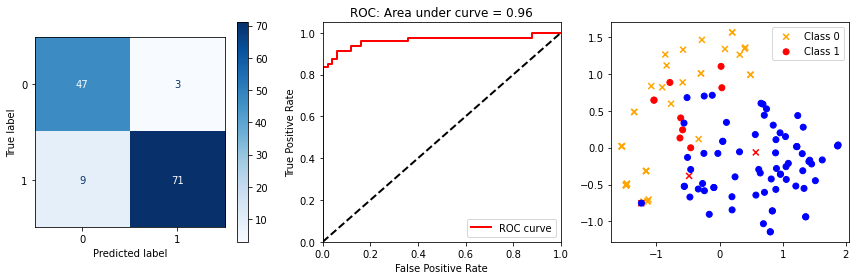

In [34]:
SGD, f_scores = start_classification(SGD, X_train, y_train, X_test, y_test, k_fold)
SGD.fit(X_train, y_train)
df_results, f2_df = test_model(SGD, 'Stochastic Gradient Descent', X_test, y_test, df_results, f_scores)

Average Test Log Loss:  0.23040439109987135
Average Accuracy:  0.9169230769230768
Average F2-Score:  0.905389766632425


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.166642  0.207428   0.232537  0.923077  0.905612
1               2.0       0.155480  0.263101   0.223644  0.923077  0.913706
2               3.0       0.171629  0.192102   0.214315  0.915385  0.903308
3               4.0       0.170839  0.181141   0.249174  0.915385  0.903308
4               5.0       0.184637  0.145254   0.232351  0.907692  0.901015

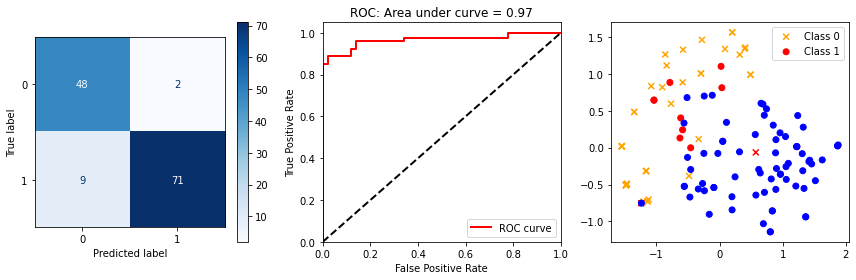

In [35]:
SGD_pca, f_scores = start_classification(SGD, X_train_pca,y_train_pca, X_test_pca, y_test_pca, k_fold_pca)
SGD_pca.fit(X_train_pca, y_train_pca)
df_results, f2_df = test_model(SGD_pca, 'Stochastic Gradient Descent PCA', X_test_pca, y_test_pca, df_results, f_scores)

#### Naive Bayes

In [36]:
NB = GaussianNB(var_smoothing = 0.02310129700083159)

Average Test Log Loss:  0.5428442135771925
Average Accuracy:  0.8969230769230769
Average F2-Score:  0.9026040536147703


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.385671  0.569027   0.507397  0.915385  0.927318
1               2.0       0.378242  0.505617   0.611040  0.892308  0.896465
2               3.0       0.378192  0.479208   0.466454  0.907692  0.917085
3               4.0       0.389755  0.314479   0.559243  0.884615  0.886076
4               5.0       0.424348  0.472312   0.570087  0.884615  0.886076

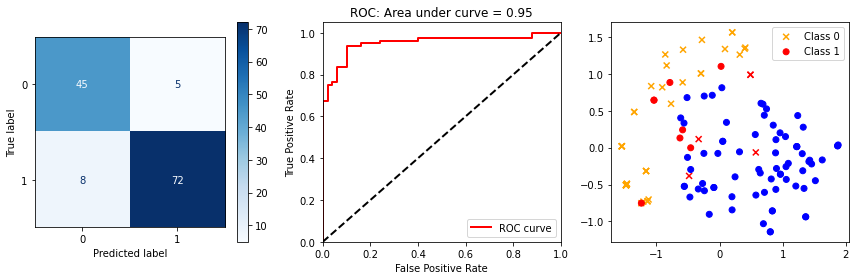

In [37]:
NB, f_scores = start_classification(NB, X_train, y_train, X_test, y_test, k_fold)
NB.fit(X_train, y_train)
df_results, f2_df = test_model(NB, 'Naive Bayes', X_test, y_test, df_results, f_scores)

Average Test Log Loss:  0.21675044094085694
Average Accuracy:  0.9230769230769231
Average F2-Score:  0.9406094527363184


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.204672  0.281881   0.210201  0.923077  0.945274
1               2.0       0.207389  0.301068   0.222988  0.923077  0.937500
2               3.0       0.213642  0.263404   0.202541  0.923077  0.945274
3               4.0       0.229584  0.201298   0.216125  0.923077  0.937500
4               5.0       0.239791  0.201388   0.231898  0.923077  0.937500

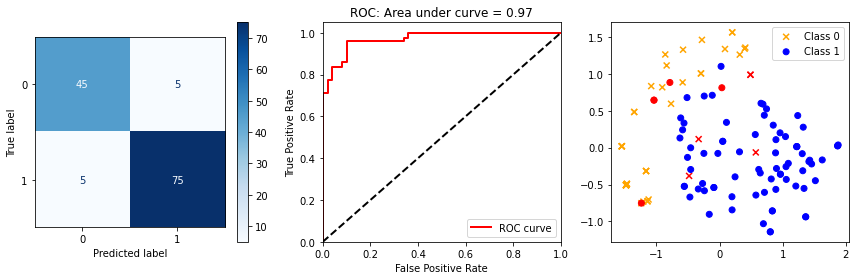

In [38]:
NB_pca, f_scores = start_classification(NB, X_train_pca, y_train_pca, X_test_pca, y_test_pca, k_fold_pca)
NB_pca.fit(X_train_pca, y_train_pca)
df_results, f2_df = test_model(NB_pca, 'Naive Bayes PCA', X_test_pca, y_test_pca, df_results, f_scores)

#### Support Vector Machine

In [39]:
SVC = SVC(C = 61, kernel='linear', probability=True)

Average Test Log Loss:  0.24330294736094213
Average Accuracy:  0.9123076923076923
Average F2-Score:  0.8974686284253455


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.181770  0.259003   0.253177  0.907692  0.884615
1               2.0       0.168181  0.265201   0.246140  0.915385  0.903308
2               3.0       0.176317  0.197071   0.220492  0.923077  0.913706
3               4.0       0.205402  0.184602   0.254107  0.907692  0.892857
4               5.0       0.191749  0.185759   0.242600  0.907692  0.892857

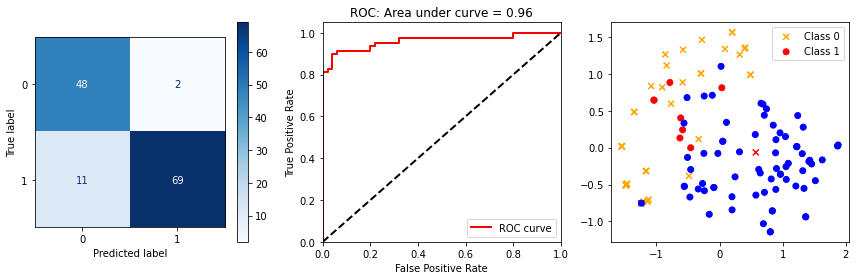

In [40]:
SVC, f_scores = start_classification(SVC, X_train, y_train, X_test, y_test, k_fold)
SVC.fit(X_train, y_train)
df_results, f2_df = test_model(SVC, 'Support Vector Machine', X_test, y_test, df_results, f_scores)

Average Test Log Loss:  0.24929366707374098
Average Accuracy:  0.8953846153846154
Average F2-Score:  0.8924996460130682


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.173301  0.206650   0.250377  0.892308  0.888325
1               2.0       0.182016  0.269336   0.251023  0.892308  0.896465
2               3.0       0.180050  0.186497   0.226901  0.915385  0.903308
3               4.0       0.182521  0.175052   0.249980  0.892308  0.888325
4               5.0       0.207982  0.176008   0.268187  0.884615  0.886076

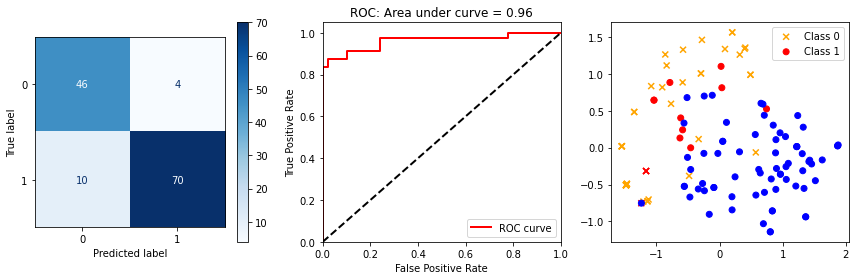

In [41]:
SVC_pca, f_scores = start_classification(SVC, X_train_pca,y_train_pca, X_test_pca, y_test_pca, k_fold_pca)
SVC_pca.fit(X_train_pca, y_train_pca)
df_results, f2_df = test_model(SVC_pca, 'Support Vector Machine PCA', X_test_pca, y_test_pca, df_results, f_scores)

#### Logistic Regression

In [42]:
LR = LogisticRegression(penalty='none', tol=0.2, C=0.0)

Average Test Log Loss:  0.23634451168850154
Average Accuracy:  0.923076923076923
Average F2-Score:  0.915284553495656


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.154588  0.222854   0.235039  0.923077  0.913706
1               2.0       0.132981  0.304949   0.234018  0.930769  0.924051
2               3.0       0.150337  0.223781   0.201375  0.938462  0.934343
3               4.0       0.157535  0.185366   0.271018  0.915385  0.903308
4               5.0       0.165338  0.175287   0.240273  0.907692  0.901015

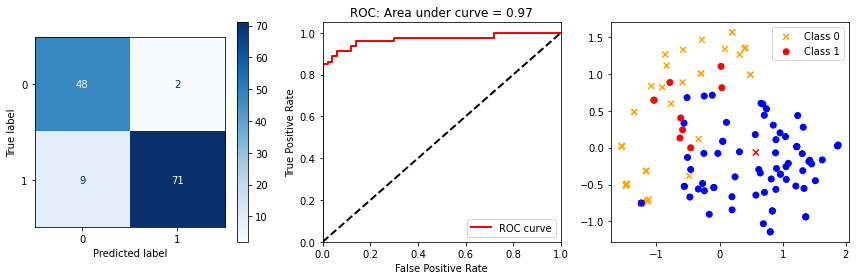

In [43]:
LR, f_scores = start_classification(LR, X_train, y_train, X_test, y_test, k_fold)
LR.fit(X_train, y_train)
df_results, f2_df = test_model(LR, 'Logistic Regression', X_test, y_test, df_results, f_scores)

Average Test Log Loss:  0.24026000769411401
Average Accuracy:  0.9199999999999999
Average F2-Score:  0.9079319564459254


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.157892  0.222860   0.233781  0.930769  0.916031
1               2.0       0.144514  0.278924   0.239636  0.923077  0.913706
2               3.0       0.162709  0.192526   0.219820  0.915385  0.903308
3               4.0       0.160572  0.197075   0.273821  0.915385  0.903308
4               5.0       0.178859  0.124773   0.234242  0.915385  0.903308

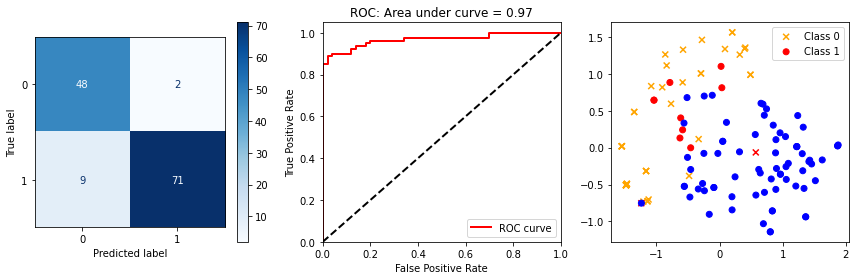

In [44]:
LR_pca, f_scores = start_classification(LR, X_train_pca,y_train_pca, X_test_pca, y_test_pca, k_fold_pca)
LR_pca.fit(X_train_pca, y_train_pca)
df_results, f2_df = test_model(LR_pca, 'Logistic Regression PCA', X_test_pca, y_test_pca, df_results, f_scores)

#### Random Forest Classifier

In [45]:
RFC = RandomForestClassifier(max_depth= 8, max_features= 'sqrt', max_leaf_nodes= None, min_samples_leaf= 1, 
                             min_samples_split= 3, n_estimators= 47, random_state=2022)

Average Test Log Loss:  0.11583588804840561
Average Accuracy:  0.9615384615384615
Average F2-Score:  0.9617898748459697


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.054340  0.122501   0.116079  0.961538  0.957179
1               2.0       0.050140  0.159705   0.125024  0.946154  0.944584
2               3.0       0.053312  0.111672   0.095173  0.984615  0.987500
3               4.0       0.055592  0.120924   0.127709  0.961538  0.964912
4               5.0       0.055119  0.128374   0.115194  0.953846  0.954774

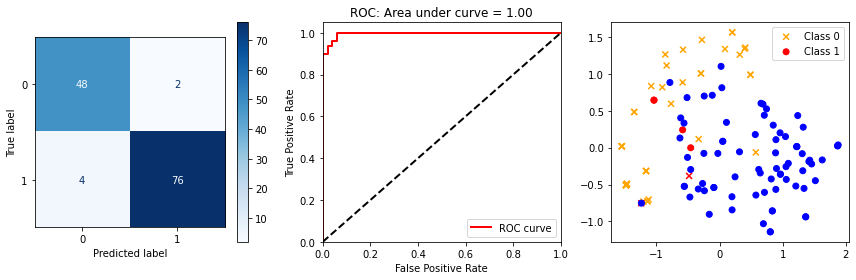

In [46]:
RFC, f_scores = start_classification(RFC, X_train, y_train, X_test, y_test, k_fold)
acc_rfc = pd.DataFrame(f_scores[0])
#RFC.fit(X_train, y_train)
df_results, f2_df = test_model(RFC, 'Random Forest', X_test, y_test, df_results, f_scores)

Text(0.5, 0, 'Feature Importance')

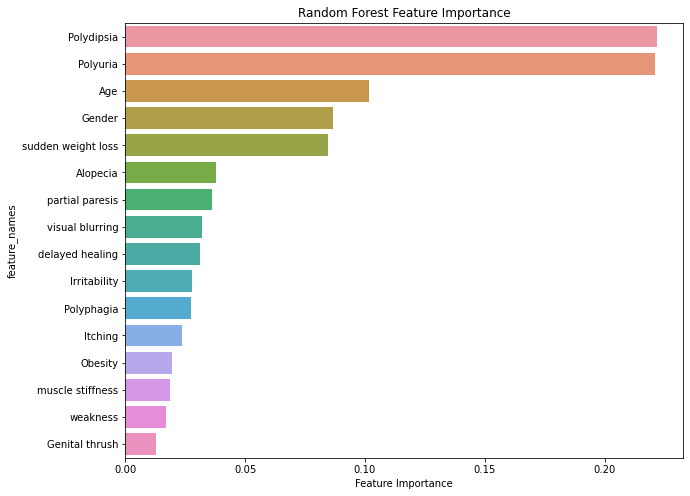

In [47]:
feature_importance = np.array(RFC.feature_importances_)
feature_names = np.array(X_train.columns)

data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')

Average Test Log Loss:  0.10466007786760682
Average Accuracy:  0.9661538461538461
Average F2-Score:  0.9709169338625332


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.044349  0.162730   0.117448  0.946154  0.952381
1               2.0       0.041530  0.165006   0.095082  0.969231  0.975000
2               3.0       0.047180  0.098922   0.087636  0.984615  0.995025
3               4.0       0.045951  0.125448   0.107879  0.961538  0.957179
4               5.0       0.046863  0.141571   0.115255  0.969231  0.975000

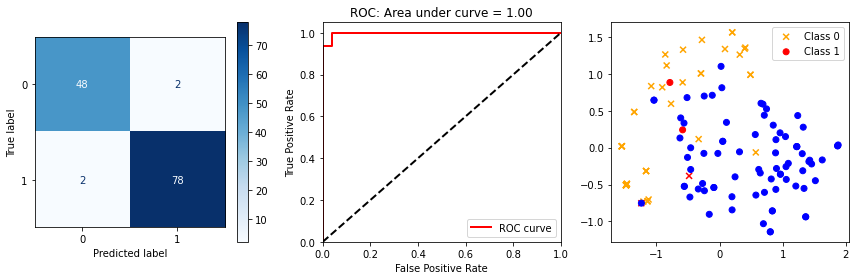

In [48]:
RFC_pca, f_scores = start_classification(RFC, X_train_pca,y_train_pca, X_test_pca, y_test_pca, k_fold_pca)
#RFC_pca.fit(X_train_pca, y_train_pca)
acc_rfc_pca = pd.DataFrame(f_scores[0])
df_results, f2_df = test_model(RFC_pca, 'Random Forest PCA', X_test_pca, y_test_pca, df_results, f_scores)

### Summary

For the evaluation of the different models, a table with the accuracy and a boxplot with the F2-score distribution are available. For the values in the table, the achieved accuracy, loss and F2 score were averaged over all training runs with k-fold. The table serves as a quick overview of which of the models performed best. 

To enable a more precise evaluation with the F2 score, all the values determined for the different runs must be considered. In the diagram you can see the range between minimum and maximum value (fine lines up and down), the average (horizontal line in wide box) and the boundaries between upper and lower quantile (wide box). This overview allows a statistical overview of all models.

In both views, the random forest is clearly recognized as the best algorithm, since it has the highest accuracy and the best F2 score. Moreover, the same classifier with PCA dimension reduced data gives even higher values. This suggests that the relevant data has been preserved and outliers have been removed. Also, the distribution of F2 scores can be interpreted as showing that the model is very robust with respect to differing data. Due to the wider range of the values, the models trained with dimension reduced data is less robust. One possible reason is that the outliers were removed in the PCA and thus the model reacts worse to unforseen data as the model trained with all data.

The trained random forest classifier stores the feature importance of the trained model. Unfortunately, this is only possible with the original data. The diagram shown in the code above shows which of the attributes have stronger and which weaker effects on the classification. Here you can nicely see that the most important attributes are also the most common symptoms in diabetes: Polyuria and Polydipsia. With background knowledge of the problem, this overview can be used as a control mechanism. So, in the present case, the first two points are truthful. 

The next point is more critical. As discussed above, there is only a very small proportion of female patients at low risk, which can lead to problems. In this case, there should not be such a strong correlation. Thus, it should be considered whether the algorithm should rather be applicable to males only (and thus trained with data from males only), since there is a more even distribution here. Furthermore, the high weight of age has to be considered in more detail to be able to evaluate a generality.

To validate the remaining entries, it needs a deeper medical knowledge.

In conclusion, the Random Tree Forest algorithm provides very good results and can be used as a robust algorithm.

In [49]:
results_left_align = df_results.style.set_properties(**{'text-align': 'left'})
display(results_left_align)

Text(0.5, 1.0, 'F2-Score Deviation of different Models')

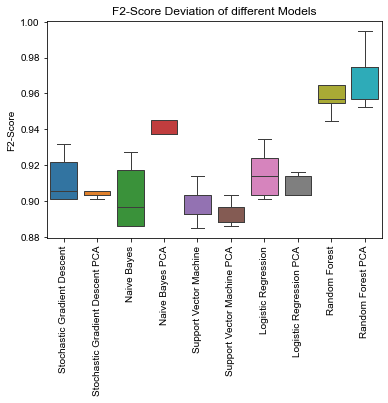

In [50]:
ax = sns.boxplot(data = f2_df, linewidth=1, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(rc = {'figure.figsize':(8,10)})
ax.set(ylabel='F2-Score')
ax.set_title('F2-Score Deviation of different Models')

## Testing Phase II: Model Development

In [51]:
def f2_metric(y_true, y_pred):
    beta = 2
    
    true_positives = K.sum(y_true * y_pred)
    predicted_positives = K.sum(y_pred)
    all_positives = K.sum(y_true)
    
    recall = true_positives / (all_positives)
    precision = true_positives / (predicted_positives)
    
    return (1+beta ** 2) * precision * recall / (beta ** 2 * precision + recall)

In [52]:
def train_model(model_function, X_train, y_train, X_test, y_test, k_fold, num_epochs, batch_size, callbacks=[]):
    trainingScores = []
    cvScores = []
    loss = []
    f2 = []
    acc = []
    i = 0
    
    results = pd.DataFrame(columns=['K-Fold Iteration', 'Training Loss', 'CV Loss', 'Test Loss' ,'Accuracy', 'F2-Score'])
    
    predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

    for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
        i+=1
        display(results)
        
        X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
        y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
        
        if model_function == 'build_model':
            model = build_model()
        elif model_function == 'model_underfitted':
            model = model_underfitted()
        elif model_function == 'model_overfitted':
            model = model_overfitted()
        elif model_function == 'best_model':
            model = best_model()
        elif model_function == 'best_model_pca':
            model = best_model_pca()
            
        if i== 1:
            history = model.fit(X_train_fold, y_train_fold, epochs=num_epochs, batch_size=batch_size, 
                                validation_data=(X_cv_fold, y_cv_fold),callbacks = callbacks, verbose=0)
        else:
            model.fit(X_train_fold, y_train_fold, epochs=num_epochs, 
                      batch_size=batch_size, validation_data=(X_cv_fold, y_cv_fold),callbacks = callbacks, verbose=0)

        #Evaluating the training performance:
        loss_train, metrics_train1, metrics_train2 = model.evaluate(X_train_fold, y_train_fold, verbose=0)
        trainingScores.append(loss_train)
        #Evaluating the CV performance:
        loss_val, metrics_val1, metrics_val2 = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
        cvScores.append(loss_val)
        #Evaluating the test performance:
        loss_test, metrics_test1, metrics_test2 = model.evaluate(X_test, y_test, verbose=0)
        
        #Append performances to dataframes
        loss.append(loss_test)
        f2.append(metrics_test1)
        acc.append(metrics_test2)
        
        new_row = {'K-Fold Iteration': int(i), 'Training Loss': loss_train, 'CV Loss': loss_val, 'Test Loss': loss_test,
                  'Accuracy': metrics_test2, 'F2-Score': metrics_test1} 
        results = results.append(new_row, ignore_index=True)
        IPython.display.clear_output(wait = True)
        
    print('Average Test Log Loss: ', np.mean(loss))
    print('Average Accuracy: ', np.mean(acc))
    print('Average F2-Score: ', np.mean(f2))
    display(results)
    
    return history, model, [loss, f2, acc]

In [53]:
def plots_nn(model, X_test, y_test, history= None, y_max = None):
    Y_test_predictions = pd.Series(model.predict(X_test).flatten(),index=X_test.index)
    fpr, tpr, thresholds = roc_curve(y_test,Y_test_predictions)
    areaUnderROC = auc(fpr, tpr)
    
    cm_matrix = Y_test_predictions.copy()
    transformer = Binarizer(threshold=0.5,copy=False)
    transformer.fit_transform(cm_matrix.values.reshape(-1, 1))
    cm = confusion_matrix(y_test, cm_matrix)
    #-----------------------------------------------------------------------------------------
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
    
    axs[0].plot(history['epoch'][10:],history['loss'][10:], "k--", linewidth=1.5, label="Training")
    axs[0].plot(history['epoch'][10:],history['val_loss'][10:], "b-.", linewidth=1.5, label="CV test")
    axs[0].legend()
    axs[0].set_title('Loss History of Trained NN')
    axs[0].set_ylim([0.0,y_max])
    axs[0].grid(False)
    axs[0].set_xlabel("Epochs"),  axs[0].set_ylabel("loss")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
    axs[1].grid(False)
    axs[1].set_title('Confusion Matrix')
    disp.plot(ax = axs[1], )
    
    axs[2].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    axs[2].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    axs[2].set_xlim([0.0, 1.0])
    axs[2].set_ylim([0.0, 1.05])
    axs[2].set_xlabel('False Positive Rate')
    axs[2].set_ylabel('True Positive Rate')
    axs[2].set_title('ROC: Area under curve = {0:0.2f}'.format(areaUnderROC))
    axs[2].legend(loc="lower right")
    
    plt.grid(False)
    
    fig.tight_layout()

#### Build first model

In order to obtain a starting model, a first neural network was generated in the following. This should serve as a basis to find a suitable network. Since 16 attributes and 520 instances are a relatively small data set and the PCA analysis suggests a good classification, a small network is chosen as a first attempt. For the initialization of the model, 8 neurons were distributed on each of 2 the layers. The last layer closes the network and contains a sigmoid function as activation function, which adjusts the output to a value range between 0 and 1. This is necessary for a binary classification. Adam is taken as optimizer.

The loss function calculates the error of the prediction and serves as a basis for the optimizer to train the network. It is also possible to plot the loss values over the epochs and thus perform an evaluation. Here the courses of the loss of the training data and the loss of the validation data are compared and one can recognize whether the net was trained overfitted, underfitted or correctly. Binary crossentropy was chosen as the function. This allows to compare the classifiers with the values of the neural network. 

In [54]:
def build_model():
    learning_rate = 0.00001
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    hp_l1_units = 8

    model = keras.Sequential()
    model.add(keras.layers.Dense(units = hp_l1_units, activation = 'selu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(units = hp_l1_units, activation = 'selu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[f2_metric, 'accuracy'])
    return model

In [55]:
num_epochs = 500
batch_size = 10

history, model_trained, metric = train_model('build_model', X_train, y_train, X_test, y_test, k_fold, num_epochs, batch_size)

Average Test Log Loss:  0.3532232463359833
Average Accuracy:  0.8769230723381043
Average F2-Score:  0.8123925924301147


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.312411  0.283157   0.314799  0.876923  0.830663
1               2.0       0.358588  0.475938   0.394165  0.846154  0.817411
2               3.0       0.382028  0.418631   0.368129  0.892308  0.799632
3               4.0       0.332182  0.340505   0.329050  0.884615  0.817902
4               5.0       0.370372  0.378597   0.359974  0.884615  0.796355

In [56]:
model_trained.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


#### History, Confusion Matrix & ROC Curve

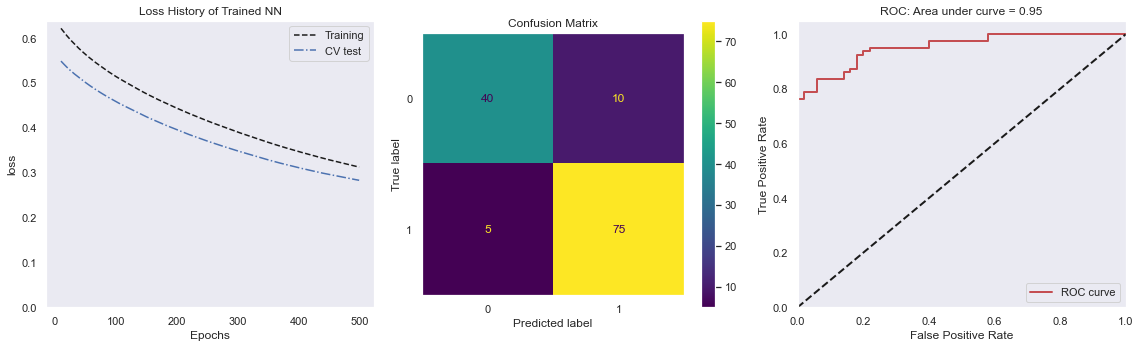

In [57]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plots_nn(model_trained, X_test, y_test, history= hist)

#### Summary of First NN

The first thing to notice is that the loss values are quite high compared to the classifiers. The confusion matrix and the ROC curve confirm this result. The losses are relatively evenly distributed, which means that the results are similar for different data sets and suggests good transferability to further data. Unfortunately, however, the model is not good. It has a low average accuracy and a low F2 score. 

When analyzing the history, it is noticeable that the model is underfitted. A possible solution is to increase the training epochs or to increase the learning rate. Adjusting the other parameters can improve the model equally well.

### Comparison: Overfitted Model

In the following model, an example of an overfitted model is implemented. It can be clearly seen that the losses of training and validation data are far apart. Furthermore, the validation loss shows a minimum with a subsequent upward trend.

In [58]:
def model_overfitted():
    learning_rate = 0.00005
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    hp_l1_units = 128

    model = keras.Sequential()
    model.add(keras.layers.Dense(units = hp_l1_units, activation = 'selu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(units = hp_l1_units, activation = 'selu'))
    model.add(keras.layers.Dense(units = hp_l1_units, activation = 'selu'))
    model.add(keras.layers.Dense(units = hp_l1_units, activation = 'selu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[f2_metric, 'accuracy'])
    return model

In [59]:
history_overfitted, model_trained_overfitted, metrics_under = train_model('model_overfitted', X_train, y_train, 
                                                             X_test, y_test, k_fold, num_epochs, batch_size)

Average Test Log Loss:  0.36228612065315247
Average Accuracy:  0.9553846001625061
Average F2-Score:  0.9663918614387512


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.001359  0.431166   0.359705  0.961538  0.979991
1               2.0       0.003837  0.768803   0.161112  0.953846  0.971020
2               3.0       0.004851  0.178853   0.099448  0.969231  0.969797
3               4.0       0.000515  0.632558   0.821497  0.946154  0.954729
4               5.0       0.002022  0.374169   0.369668  0.946154  0.956423

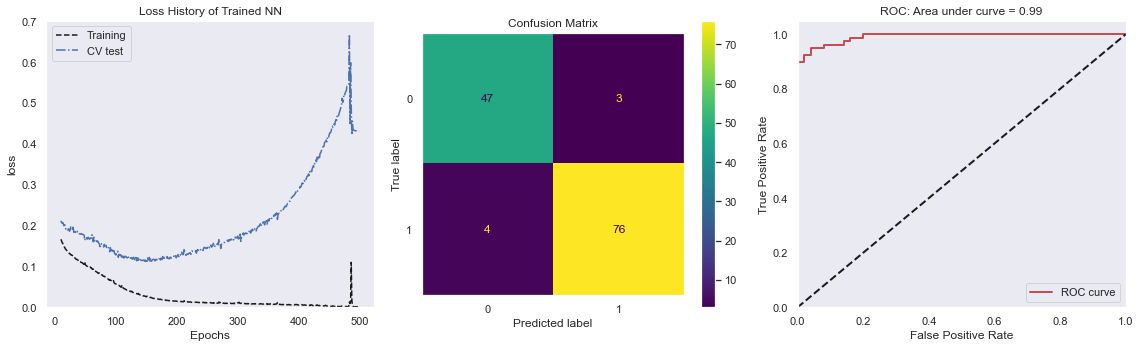

In [60]:
hist_over = pd.DataFrame(history_overfitted.history)
hist_over['epoch'] = history_overfitted.epoch
plots_nn(model_trained_overfitted, X_test, y_test, history= hist_over)

## Testing Phase III: Model Regularization and Hyperparameter optimization

In response to the first neural network, a parameter search was performed with hyperband to find the best setting of the parameters. The code for this is shown in the appendix. A model that was found to be suitable is rebuilt and trained in the following. As with the classifiers, the model is trained with the original data and the dimension reduced data. This has already led to better results above.

The biggest problem was to get constant accuracy and F2 scores over all k-folds. This is important to ensure the generality of the model. The first idea was to reduce k to increase the size of the data set. The larger the data set the better the training. A k of 5 is already relatively low to make a generally valid statement and a statistical evalutation, a further reduction would make the results even worse. Therefore, this was not an approach I wanted to pursue.

The next idea was to increase the neurons and layers with simultaneous introduction of kernel regularizer. This penalizes high weight values and thus counteracts overfitting. Here I chose the L1L2 regularizer because it penalizes both linear and qudratic error and thus reacts particularly strongly to outliers. This counteracts overfitting of the model. In addition, early stopping supports this effect. This also allows the number of neurons to be increased to more than necessary. The regularizer led to an decreased accuracy and a F2-Score, which had to be compensated again.

Finally, I increased the batch value, which trained more accurate and robust models.

#### Build Model

In [211]:
def best_model():
    opt = tf.keras.optimizers.Adam()
    learning_rate = 10e-4
    activation_fkt = 'selu'
    hp_l1 = 0.001
    hp_l2 = 0.001
    num_units = 50
    num_layer = 4
    kernel = tf.keras.regularizers.L1L2(l1=hp_l1, l2=hp_l2)

    model = keras.Sequential()
    
    model.add(layers.Dense(units = num_units, kernel_regularizer=kernel, activation= activation_fkt, 
                           input_shape=(X_train.shape[1],)))
    for i in range(num_layer):
        model.add(keras.layers.Dense(units = num_units, kernel_regularizer=kernel, activation = activation_fkt)) 

    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[f2_metric, 'accuracy'])
    return model

#### Train Model

In [212]:
epochs= 1000
batch_size = int(X_train.shape[1]/1) #10

myCheckpoint= keras.callbacks.ModelCheckpoint("my_best_model.h5", save_best_only=True)
myEarly_stopping = keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)
callbacks = [myCheckpoint,myEarly_stopping]

history_best_model, model_trained_best_model, metrics_best_model = train_model('best_model', X_train, y_train, 
                                                X_test, y_test, k_fold, num_epochs, batch_size, callbacks)

Average Test Log Loss:  0.24973873794078827
Average Accuracy:  0.9661538362503052
Average F2-Score:  0.9625568985939026


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.146020  0.236953   0.248019  0.961538  0.960655
1               2.0       0.129845  0.345753   0.188388  0.969231  0.966555
2               3.0       0.114783  0.195105   0.162702  0.984615  0.972942
3               4.0       0.214415  0.310880   0.350643  0.946154  0.947551
4               5.0       0.257289  0.298879   0.298941  0.969231  0.965081

In [213]:
best_model = keras.models.load_model("my_best_model.h5", custom_objects = {'f2_metric': f2_metric})

In [214]:
best_model.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_652 (Dense)           (None, 50)                850       
                                                                 
 dense_653 (Dense)           (None, 50)                2550      
                                                                 
 dense_654 (Dense)           (None, 50)                2550      
                                                                 
 dense_655 (Dense)           (None, 50)                2550      
                                                                 
 dense_656 (Dense)           (None, 50)                2550      
                                                                 
 dense_657 (Dense)           (None, 1)                 51        
                                                                 
Total params: 11,101
Trainable params: 11,101
Non-tr

#### History, Confusion Matrix & ROC Curve

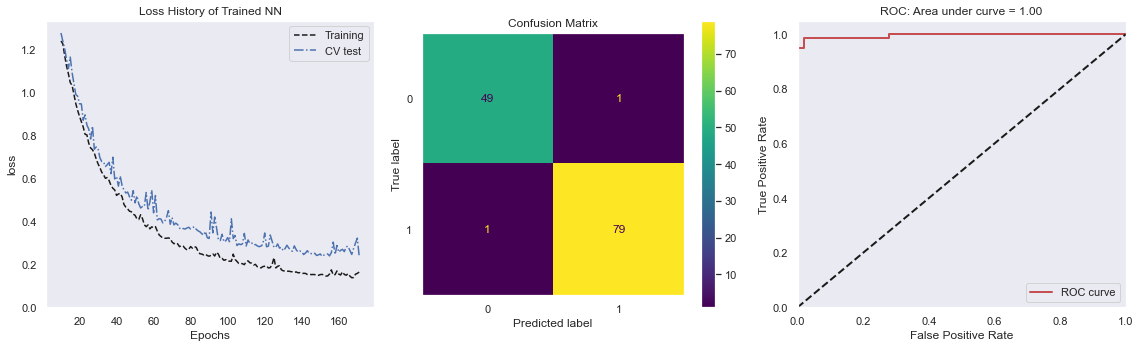

In [215]:
hist_best_model = pd.DataFrame(history_best_model.history)
hist_best_model['epoch'] = history_best_model.epoch
plots_nn(best_model, X_test, y_test, hist_best_model)

### NN with Data from PCA

#### Build Model

In [84]:
def best_model_pca():
    opt = tf.keras.optimizers.Adam()
    learning_rate = 10e-4
    activation_fkt = 'selu'
    hp_l1 = 0.001
    hp_l2 = 0.001
    num_units = 50
    num_layer =  4
    kernel = tf.keras.regularizers.L1L2(l1=hp_l1, l2=hp_l2)
    
    model = keras.Sequential()
    
    model.add(layers.Dense(units = num_units, kernel_regularizer=kernel, activation= activation_fkt, 
                           input_shape=(X_train_pca.shape[1],)))
    for i in range(num_layer):
        model.add(keras.layers.Dense(units = num_units, kernel_regularizer=kernel, activation = activation_fkt)) 

    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[f2_metric, 'accuracy'])
    return model

#### Train Model

In [85]:
num_epochs= 1000
batch_size = int(X_train_pca.shape[0] / 2) #10

myCheckpoint= keras.callbacks.ModelCheckpoint("my_best_model_pca.h5", save_best_only=True)
myEarly_stopping = keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)
callbacks = [myCheckpoint,myEarly_stopping]

history_best_model_pca, model_trained_best_model_pca, metrics_best_model_pca = train_model('best_model_pca', 
                                                X_train_pca, y_train_pca, 
                                                X_test_pca, y_test_pca, k_fold_pca, num_epochs, batch_size, callbacks)

Average Test Log Loss:  0.22297854125499725
Average Accuracy:  0.9661538362503052
Average F2-Score:  0.9651674389839172


K-Fold Iteration  Training Loss   CV Loss  Test Loss  Accuracy  F2-Score
0               1.0       0.156309  0.267526   0.215656  0.969231  0.965573
1               2.0       0.176559  0.380639   0.231028  0.969231  0.960729
2               3.0       0.144417  0.258076   0.215976  0.961538  0.961676
3               4.0       0.190163  0.292219   0.303582  0.946154  0.952749
4               5.0       0.131985  0.112717   0.148651  0.984615  0.985111

In [86]:
best_model_pca = keras.models.load_model("my_best_model_pca.h5", custom_objects = {'f2_metric': f2_metric})
best_model_pca.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 50)                650       
                                                                 
 dense_155 (Dense)           (None, 50)                2550      
                                                                 
 dense_156 (Dense)           (None, 50)                2550      
                                                                 
 dense_157 (Dense)           (None, 50)                2550      
                                                                 
 dense_158 (Dense)           (None, 50)                2550      
                                                                 
 dense_159 (Dense)           (None, 1)                 51        
                                                                 
Total params: 10,901
Trainable params: 10,901
Non-tra

#### History, Confusion Matrix & ROC Curve

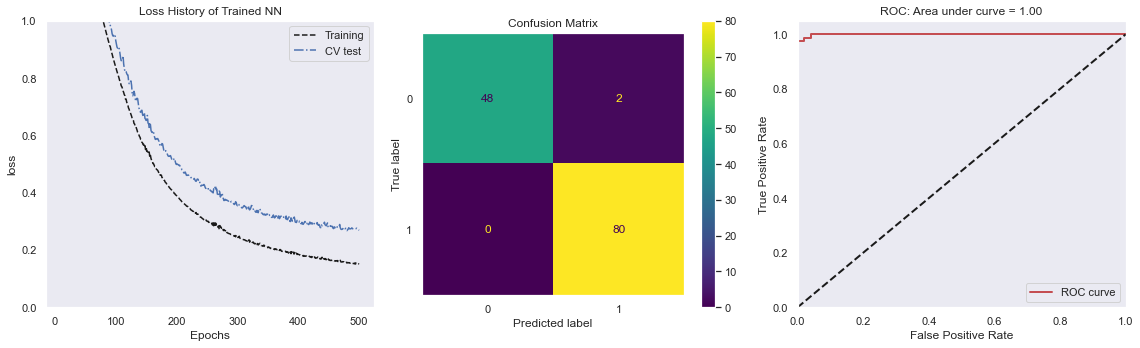

In [87]:
hist_best_model_pca = pd.DataFrame(history_best_model_pca.history)
hist_best_model_pca['epoch'] = history_best_model_pca.epoch
plots_nn(best_model_pca, X_test_pca, y_test_pca, hist_best_model_pca, y_max= 1)

### Comparison NN and Classificator

In [216]:
compare_f = pd.DataFrame()
compare_f['Random Forest'] = f2_df['Random Forest']
compare_f['Random Forest PCA'] = f2_df['Random Forest PCA']
f_NN_df = pd.DataFrame(metrics_best_model[1])
compare_f['Neural Network'] = f_NN_df
f_NN_df_pca = pd.DataFrame(metrics_best_model_pca[1])
compare_f['Neural Network PCA'] = f_NN_df_pca

In [217]:
compare_acc = pd.DataFrame()
compare_acc['Random Forest'] = acc_rfc
compare_acc['Random Forest PCA'] = acc_rfc_pca
acc_NN_df = pd.DataFrame(metrics_best_model[2])
compare_acc['Neural Network'] = acc_NN_df
acc_NN_df_pca = pd.DataFrame(metrics_best_model_pca[2])
compare_acc['Neural Network PCA'] = acc_NN_df_pca

Text(0.5, 1.0, 'F2-Score Deviation of best Classificator and Neural Network')

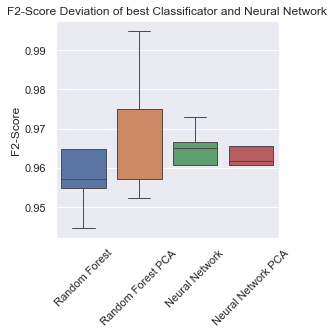

In [218]:
ax = sns.boxplot(data = compare_f, linewidth=1, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.set(rc = {'figure.figsize':(4,4)})
ax.set(ylabel='F2-Score')
ax.set_title('F2-Score Deviation of best Classificator and Neural Network')

Text(0.5, 1.0, 'Accuracy Deviation of best Classificator and Neural Network')

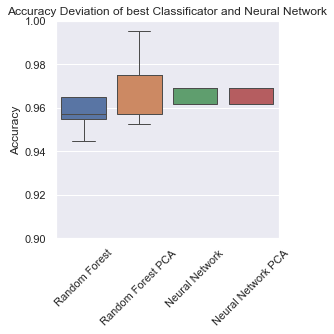

In [219]:
ax = sns.boxplot(data = compare_acc, linewidth=1, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.set(rc = {'figure.figsize':(4,4)})
ax.set(ylabel='Accuracy')
ax.set_ylim([0.9,1])
ax.set_title('Accuracy Deviation of best Classificator and Neural Network')

### Summary

The two metrics used for evaluation were shown for the best classifier and the two neural networks. Here we can clearly see that the two neural networks have a good accuracy and a high F2 score. Moreover, the range of F2 values is lower for the PCA trained network than for the other models suggesting a better robustness and a higher generality.

## Lessons Learned and Conclusion

With the given data set, it is therefore possible to detect an increased diabetes risk with good accuracy using the given questionnaire. However, the data must be checked again, since there is a discrepancy between real data and the given data set. Furthermore, it has to be checked how far the data can be applied to women. <br>
This type of questionnaire is already used in the medical field, so the data is available. Therefore, to assist the physician, it would be useful to perfect the classifiers and apply them to the data.

As already noted in principal component analysis and the 2D plot, the data can be classified well. Since patterns could already be seen on the plot, it is a comparatively easy problem to classify. For this type of problem, classifiers like Random Forest give equally good results as neural networks, but are easier to implement. Therefore, for later problems, I would first see if you can't solve the problem quickly and easily with these algorithms.

## Additional: Hyperparameter Search for NN

In [74]:
'''train_dataset = df.sample(frac=0.75, random_state=2022)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('class')
test_labels = test_features.pop('class')

def model_builder(hp):
    model = keras.Sequential()

    hp_dropout = hp.Float('dropout', min_value = 0, max_value = 0.5, step = 0.1)
    hp_activation_function = hp.Choice('activation_function', values = ['relu', 'tanh', 'sigmoid', 'softmax', 'selu', 'elu'])

    hp_bonuslayers = hp.Int('bonuslayers', min_value = 1, max_value = 5, step = 1)
    hp_l1 = hp.Float('l1', min_value = 0, max_value = 0.2, step = 0.01)
    hp_l2 = hp.Float('l2', min_value = 0, max_value = 0.2, step = 0.01)
    hp_units = hp.Choice('units', values = [2,3,4,6,7,8,9,10,12,14,15,16,20,22,25,28,32,64,80,100,128,150])

    model.add(keras.layers.Dense(units = hp_units,
                               activation = hp_activation_function, input_shape=(train_features.shape[1],), 
                                kernel_regularizer=tf.keras.regularizers.L1L2(l1=hp_l1, l2=hp_l2)))
    #model.add(keras.layers.Dropout(hp_dropout))
    #model.add(keras.layers.Dense(units = hp_units, activation = hp_activation_function)) 
                                 #kernel_regularizer=tf.keras.regularizers.L1L2(l1=hp_l1, l2=hp_l2)))

    for i in range(hp_bonuslayers):
        #model.add(keras.layers.Dropout(hp_dropout))
        model.add(keras.layers.Dense(units = hp_units, activation = hp_activation_function,
                                 kernel_regularizer=tf.keras.regularizers.L1L2(l1=hp_l1, l2=hp_l2)))

    model.add(keras.layers.Dense(1, activation = 'sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-4,1e-5, 1e-6, 1e-7, 1e-8, 1e-9])
  
    hp_optimizer=optimizer=tf.keras.optimizers.Adam(hp_learning_rate)

    model.compile(optimizer = hp_optimizer, loss='binary_crossentropy', metrics = 'accuracy')

    return model
    #tf.keras.metrics.Precision()
    
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)
    
tuner = kt.Hyperband(model_builder,
                     objective = kt.Objective('val_accuracy', direction = 'max'),
                     max_epochs = 200,
                     factor = 3,
                     hyperband_iterations=3,
                     tune_new_entries=True,
                     allow_new_entries=True,
                     directory = 'hparams_search')
print(tuner.search_space_summary())

tuner.search(train_features, train_labels, validation_data = (test_features, test_labels), batch_size=train_features.shape[0], 
            callbacks = [ClearTrainingOutput(), tf.keras.callbacks.EarlyStopping(patience=10)])
  
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(tuner.results_summary())

model = tuner.hypermodel.build(best_hps)

model.summary()'''

"train_dataset = df.sample(frac=0.75, random_state=2022)\ntest_dataset = df.drop(train_dataset.index)\n\ntrain_features = train_dataset.copy()\ntest_features = test_dataset.copy()\n\ntrain_labels = train_features.pop('class')\ntest_labels = test_features.pop('class')\n\ndef model_builder(hp):\n    model = keras.Sequential()\n\n    hp_dropout = hp.Float('dropout', min_value = 0, max_value = 0.5, step = 0.1)\n    hp_activation_function = hp.Choice('activation_function', values = ['relu', 'tanh', 'sigmoid', 'softmax', 'selu', 'elu'])\n\n    hp_bonuslayers = hp.Int('bonuslayers', min_value = 1, max_value = 5, step = 1)\n    hp_l1 = hp.Float('l1', min_value = 0, max_value = 0.2, step = 0.01)\n    hp_l2 = hp.Float('l2', min_value = 0, max_value = 0.2, step = 0.01)\n    hp_units = hp.Choice('units', values = [2,3,4,6,7,8,9,10,12,14,15,16,20,22,25,28,32,64,80,100,128,150])\n\n    model.add(keras.layers.Dense(units = hp_units,\n                               activation = hp_activation_function,

In [75]:
#model.fit(train_features,
#        train_labels,
#        epochs = 300,
#        validation_data = (test_features, test_labels),
#        callbacks = [ClearTrainingOutput(),
#        tf.keras.callbacks.EarlyStopping(patience=5)])
#model.summary()
#    
#model.save('dnn_model_hp2')
#
#model = keras.models.load_model('dnn_model_hp2')
#config = model.get_config()